# Titanic Survival Analysis using Logistic Regression with sklearn

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading Training and Testing Data

In [2]:
trainData = pd.read_csv(r"C:\Users\chaak\Downloads\titanic\train.csv")
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testData = pd.read_csv(r"C:\Users\chaak\Downloads\titanic\test.csv")
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Cleaning

### Training Data Clean

In [20]:
#y is a Pandas Series
#x is a Pandas 2D DataFrame
xTrain = trainData[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

#There is missing Ages in the data, so we will fill in with the Median
medAge = (trainData.Age.median())
xTrain['Age'] = xTrain.Age.fillna(medAge)

#Restructure Sex to Male (0) Female (1) for scikit-learn
xTrain['Sex'] = xTrain.Sex.map({'male' : 0, 'female' : 1})

#y is a Pandas Series
y = trainData['Survived']

#Split intro train and validation sets (20% validation, 80% training)
#random state ensures consistent outcomes at each run
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    xTrain, y, test_size=0.2, random_state=42)


print(xTrain)

     Pclass  Sex   Age  SibSp  Parch     Fare
0         3    0  22.0      1      0   7.2500
1         1    1  38.0      1      0  71.2833
2         3    1  26.0      0      0   7.9250
3         1    1  35.0      1      0  53.1000
4         3    0  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    0  27.0      0      0  13.0000
887       1    1  19.0      0      0  30.0000
888       3    1  28.0      1      2  23.4500
889       1    0  26.0      0      0  30.0000
890       3    0  32.0      0      0   7.7500

[891 rows x 6 columns]


### Testing Data Clean

In [21]:
#x is a Pandas 2D DataFrame
xTest = testData[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

#There is missing Ages in the data, so we will fill in with the Median
medAge = (testData.Age.median())
xTest['Age'] = xTest.Age.fillna(medAge)

#Missing Fare in Test Data, will fill with Median Fare
medFare = (testData.Fare.median())
xTest['Fare'] = xTest.Fare.fillna(medFare)

#Restructure Sex to Male (0) Female (1) for scikit-learn
xTest['Sex'] = xTest.Sex.map({'male' : 0, 'female' : 1})

print(xTrain)

     Pclass  Sex   Age  SibSp  Parch     Fare
0         3    0  22.0      1      0   7.2500
1         1    1  38.0      1      0  71.2833
2         3    1  26.0      0      0   7.9250
3         1    1  35.0      1      0  53.1000
4         3    0  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    0  27.0      0      0  13.0000
887       1    1  19.0      0      0  30.0000
888       3    1  28.0      1      2  23.4500
889       1    0  26.0      0      0  30.0000
890       3    0  32.0      0      0   7.7500

[891 rows x 6 columns]


## Normalizing Testing and Training Data

In [25]:
#Data Normalization
scaler = StandardScaler()

#Fitting training data to the scaler, and then transforming both training and validation
x_train_scaled  = scaler.fit_transform(x_train_split)
x_val_scaled= scaler.transform(x_val_split)

## Fitting the Model

In [23]:
#Loading the logistic regression model from sklearn and fitting it to the training data
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train_split)

LogisticRegression()

## Predicting Survival on Test Data

Here we test our model on the validation set and assess for accuracy

In [26]:
y_pred = lr_model.predict(x_val_scaled)
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


Prediction Interpretation:
- Survived (1)
- Dead (0)


## Training Evaluation

### Accuracy Score

In [29]:
accuracy = accuracy_score(y_val_split, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.7988826815642458


Predictions were about 79.888% accurate

### Classification Report:

In [30]:
print(classification_report(y_val_split, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



- Precision: Precision measures the proportion of correct positive predictions out of all positive predictions. In this case, the model was 78% precise when predicting survival (1) and 81% precise when prediting death (0). The weighted average precision across both classes is approximately 80%
  
- Recall: Recall measures the proportion of actual positives that were correctly identified. The model recalled 72% of actual survivors and 86% of actual deaths, showing it was slightly better at identifying passengers who didn't survive

- Overall Accuracy: The model achieved a validation accuracy of 79.888%, meaning it correctly predicted the survival status for about 80% of passengers in the validation set.

### Confusion Matrix Plot

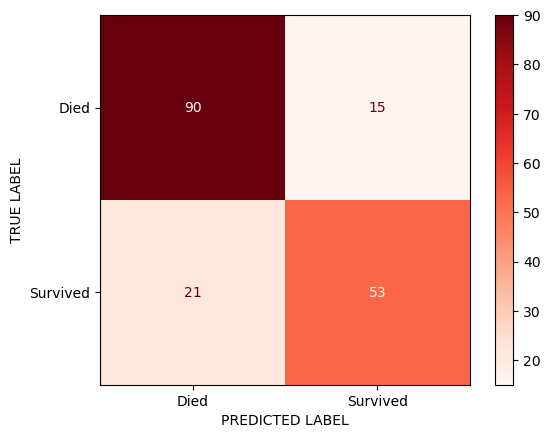

In [41]:
cm = confusion_matrix(y_val_split, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Survived"])
disp.plot(cmap="Reds")
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.show()

## Feature Analysis

In [9]:
coeff = lr_model.coef_[0]
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coeff
})

coef_df['AbsCoefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient',ascending=False)
coef_df

,feature,coefficient,AbsCoefficient
1,Sex,1.303845,1.303845
0,Pclass,-0.892475,0.892475
2,Age,-0.501763,0.501763
3,SibSp,-0.376069,0.376069
5,Fare,0.144675,0.144675
4,Parch,-0.084242,0.084242


The coeffecients are the weights calculated by the logistic regression model.

- Positive coefficients mean the feature increases the chance of survival (label=1)
- Negative coefficients mean the feature decreases the chance of survival (label=0)
- The model fits a decision boundary curve based on training data and utulizes it in predicting survival rates on test data

Text(0.5, 1.0, 'Feature Importance based on Logistic Regression Coefficients')

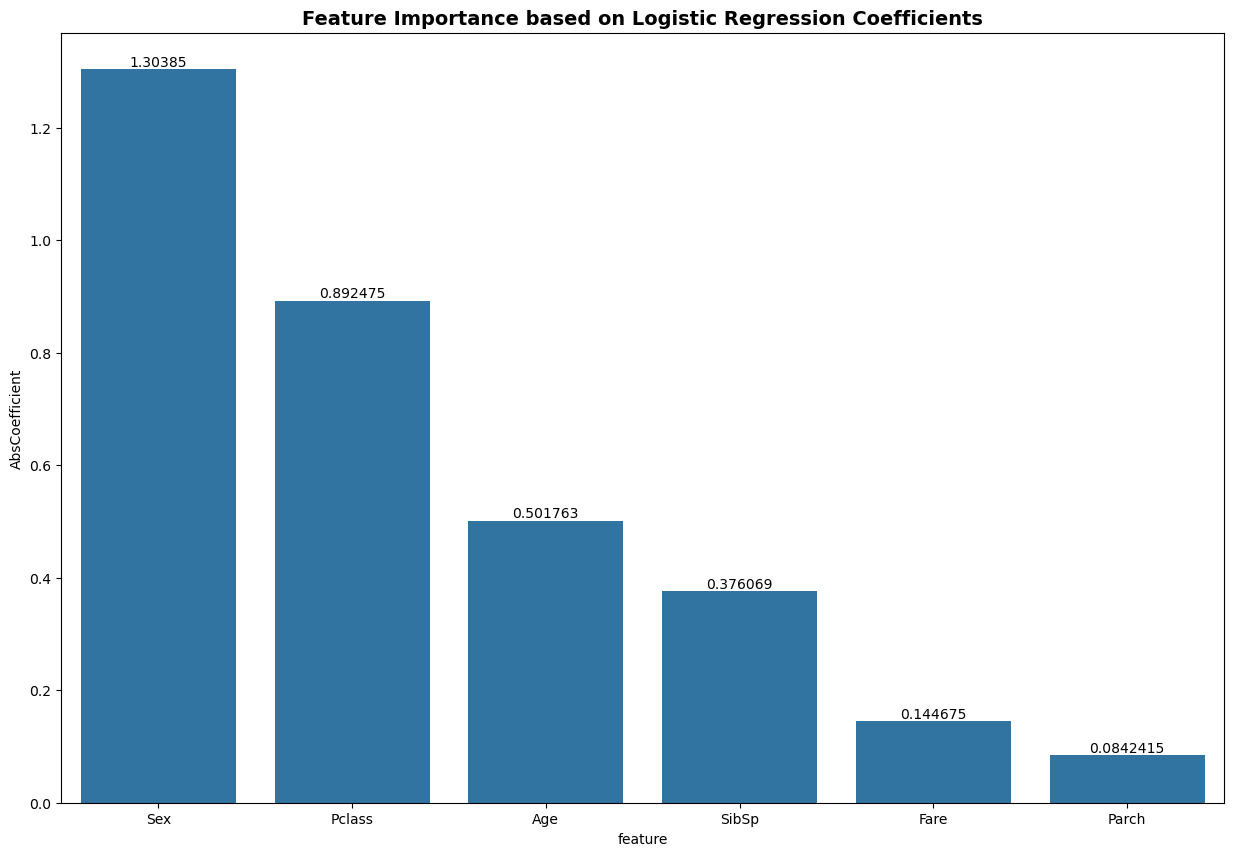

In [17]:
#just based on strength
plt.figure(figsize=(15,10))
ax = sns.barplot(x='feature', y='AbsCoefficient', data=coef_df)
ax.bar_label(ax.containers[0])
plt.title('Feature Importance based on Logistic Regression Coefficients', fontsize=14,fontweight='bold')

This bar graph illustrates the importance of each feature in predicting survival, aligning well with historical facts about the Titanic disaster.

- Sex is the most influential factor, reflecting the historical “women and children first” evacuation policy.

- Pclass (passenger class) significantly impacted survival chances, as first-class passengers had better access to lifeboats and were generally closer to the upper decks, unlike many third-class passengers who faced barriers to escape.

- Age also played a role, with children—especially in first and second class—having higher survival rates, while older adults may have struggled during evacuation.

- SibSp (number of siblings/spouses aboard) shows that having one or two family members slightly improved survival odds, but larger groups likely reduced chances due to the difficulty of evacuating together.

- Fare correlates with passenger class but provides a weaker predictive signal on its own, as some expensive tickets covered multiple passengers.

## Final Insights & Next Steps

- I found that the model demonstrated decent accuracy in predicting survival rates using only a handful of key features. 80% accuracy is pretty reasonable for this logistic regression model
- The feature importance is consistent with historical accounts of survival
- The model tends to predict non-survivors more accurately than survivors. The model will not be 100% accurate in predicting survival due to its limitation of features.


Improvements to Consider:
- Experiment with more advanced models for increased accuracy (Random Forest) and better performance
- incorporate additional features such as Cabin, Title extracted from names, for richer context and stronger predictions